# **Проект исследования абонентов компании Мегалайн**

## **Вводная часть**

Целью исследования является анализ двух тарифов оператора, по случайной выборке абонентов в размере 500 человек. 

Задача - выбрать, какой тариф лучше с точки зрения денег, приносимых компании.

**Описание тарифов**

Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

**План исследования с оглавлением**

Работать с данными будем в следующем порядке:
 - [подготовка данных](#предобработка)
 - [исследовательский анализ данных, графики, локальные выводы](#ИАД)
 - [проверка гипотез](#гипотезы)
 - [общий вывод исследования](#выводы)
 - [данные о датасетах](#данные)

## **Подготовка данных**  <a id = 'предобработка'></a> 



У нас в наличии есть следующие файлы:

- /datasets/calls.csv.  - информация о совершенных звонках
- /datasets/internet.csv. - информация об использованном трафике интернет
- /datasets/messages.csv.  - информация о сообщениях
- /datasets/tariffs.csv. - информация о тарифах
- /datasets/users.csv.  - информаци о пользователях

Пойдем следующим путем: будем по одному открывать датасеты, проверять их на наличие пропусков , дубликатов, обрабатывать. Начнем с иформации о пользователях, и затем будем к этой информации добавлять обработанные данные из датасетов по интернету, звонкам и так далее

In [1]:
# импортируем небходимые для работы библиотеки
import pandas as pd

import math

import numpy as np

from matplotlib import pyplot as plt

from scipy import stats as st

In [2]:
# откроем датасет с информацией о пользователях
# используем конструкцию try / except для возможности открыть локально или с сервера
try:
    users = pd.read_csv(r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Мегалайн\users.csv')
except:
    users = pd.read_csv('/datasets/users.csv')

users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В дата сете, как и должно быть, есть данные о 500 абонентах. 38 из них прекратили пользование тарифом на момент выгрузки.

<AxesSubplot:>

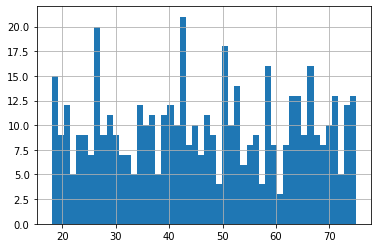

In [4]:
# посмортим с помощью гистограммы на данные по возрасту пользователей
users['age'].hist(bins = 50)

слишком молодых или слишком пожилых абонентов не обнаружено, несколько неравномерное распределение по возрастам, есть пики, есть провалы, выдимо особенность выборки

In [5]:
# посмотрим на обонентов, у которых закончился тариф
users.query('not(churn_date.isna())')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart
56,1056,73,2018-10-14,Иркутск,Радислав,Артемьев,2018-04-13,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
63,1063,45,2018-12-11,Тула,Таира,Климова,2018-04-12,ultra
64,1064,55,2018-12-26,Якутск,Динара,Алфеева,2018-03-17,smart
65,1065,53,2018-12-09,Москва,Роза,Игнатова,2018-03-08,smart


Все они какое-то время пользовались одним или вторым тарифом, исключать их из выборки не будем

In [6]:
# посмотрим на уникальные значения в названиях городов, проверим их на неявные дубликаты
users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Визуально дубликатов не видно

Имена и фамилии нас не интересуют, но и убирать их из датафрейма не будем.

In [7]:
# приведем столбец даты подключения к формату даты
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')

<AxesSubplot:>

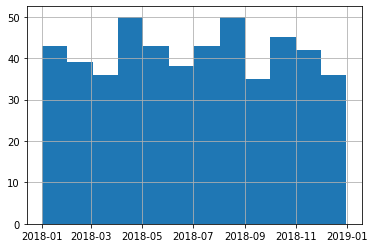

In [8]:
# визуально проверим дату регистрации абонента
users['reg_date'].hist(bins = 12)
# видим, что все абоненты зарегистрировались в 2018 году

In [9]:
# и проверим, нет ли лишних тарифов в таблице
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Пользователей тарифа Смарт больше, что логично, так как у него меньше абонентская плата. Никаких лишних тарифов в данных нет.

In [10]:
# и проверим датасет на наличие дубликатов
users.duplicated().sum()

0

Отлично, дупликатов нет!

Рассмотрим датасет с информацией о звонках

In [11]:
try:
    calls = pd.read_csv(r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Мегалайн\calls.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')

display(calls.head(10))
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


всего абоненты совершили 202607 звонков. Для дальнейшей обработки необходимо:
- привести столбец call_date в формат даты
- внести дополнительный столбец с информацией о месяце совершения звонка
- округлить значение длительности звонка в большую сторону, так как по правилам оператора каждый звонок округляется до минуты в большую сторону

После этого можно будет сформировать сводную таблицу с информацией о количестве и длительности звонков абонентов

,id,call_date,duration,user_id,call_month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          202607 non-null  object        
 1   call_date   202607 non-null  datetime64[ns]
 2   duration    202607 non-null  int64         
 3   user_id     202607 non-null  int64         
 4   call_month  202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


<AxesSubplot:>

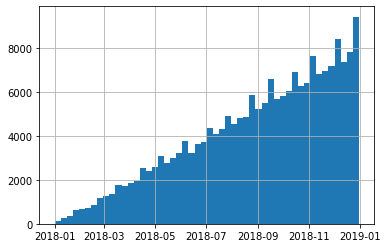

In [12]:
# приведем столбец даты звонка в формат даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')

# и дополним датафрейм столбцом о месяце совершения звонка
calls['call_month'] = pd.DatetimeIndex(calls['call_date']).month

# округлим длительность звонка до минуты в большую сторону и приведем к целому
calls['duration'] = np.ceil(calls['duration']).astype('int')

display(calls.head())
calls.info()
calls['call_date'].hist(bins = 50)

График количества звонков от начала года к концу идет постоянно по нарастающей, что логично, так как обоненты в выборке подключались к тарифам в течении года, и только у 38 из 500 тариф прекратил свое действие. 

Можно предположить, что отдельные выбросы вверх являются следствием каких-то рекламных кампаний по привлечению новых клиентов.

Сделаем сводную таблицу по абонентам, с подсчетом количества и длительности звонков, с разбивкой по месяцам

In [13]:
calls_pivot_month = calls.pivot_table(index = ['user_id', 'call_month'], 
                                          values = 'duration', aggfunc = ('sum', 'count'), fill_value=0).reset_index()

calls_pivot_month.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls_pivot_month.head(10)

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


In [14]:
calls_pivot_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      3174 non-null   int64
 1   month        3174 non-null   int64
 2   calls_count  3174 non-null   int64
 3   calls_sum    3174 non-null   int64
dtypes: int64(4)
memory usage: 99.3 KB


In [15]:
# эту часть кода написал для себя, что бы проверить, что через groupby можно получить тот же результат
# что и через сводную таблицу
#calls_grouped_month = calls.groupby(['user_id','call_month'])['duration'].sum().reset_index()
#calls_grouped_month.head()

Итак у нас есть данные, сколько каждый абонент раз и какой длительности вел разговоры в каждый из месяцев.


Посмотрим, какое количество сообщений отправляют абоненты в каждый из месяцев

In [16]:
try:
    messages = pd.read_csv(r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Мегалайн\messages.csv')
except:
    messages = pd.read_csv('/datasets/messages.csv')

display(messages.head(10))
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [17]:
# приведем колонку даты сообщения к формату даты
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

# и дополним датафрейм столбцом о месяце совершения звонка
messages['message_month'] = pd.DatetimeIndex(messages['message_date']).month
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             123036 non-null  object        
 1   message_date   123036 non-null  datetime64[ns]
 2   user_id        123036 non-null  int64         
 3   message_month  123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


<AxesSubplot:>

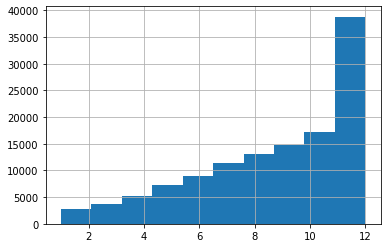

In [18]:
# посмотрим на гистограмму по месяцам
messages['message_month'].hist()

Как и следовало ожидать, вместе с ростом количества абонентов росло и количество СМС в месяц, достигнув пика в декабре, с большим отрывом от предыдущих месяцев, что вероятно объясняется прадником НГ.

In [19]:
# сформируем таблицу по абонентам в разрезе месяцев
messages_pivot_month = messages.pivot_table(index = ['user_id', 'message_month'], values = 'id',
                                             aggfunc = 'count', fill_value=0).reset_index()

messages_pivot_month.columns = ['user_id', 'month', 'message_count']
messages_pivot_month.head()
#messages_pivot_month.info()

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Исследуем данные по ежемесячному трафику, используемым абонентами

In [20]:
try:
    internet = pd.read_csv(r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Мегалайн\internet.csv')
except:
    internet = pd.read_csv('/datasets/internet.csv')

display(internet.head(10))
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Как и ранее, приведем стобец даты сессии к формату даты и создадим дополнительный столбец месяца

In [21]:
# приведем колонку даты сообщения к формату даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

# и дополним датафрейм столбцом о месяце совершения звонка
internet['session_month'] = pd.DatetimeIndex(internet['session_date']).month
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     149396 non-null  int64         
 1   id             149396 non-null  object        
 2   mb_used        149396 non-null  float64       
 3   session_date   149396 non-null  datetime64[ns]
 4   user_id        149396 non-null  int64         
 5   session_month  149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


In [22]:
# сформируем таблицу по абонентам в разрезе месяцев
internet_pivot_month = internet.pivot_table(index = ['user_id', 'session_month'], values = 'mb_used',
                                             aggfunc = 'sum', fill_value=0).reset_index()

internet_pivot_month.head()

,user_id,session_month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [23]:
# так как по правилам оператора мегабайты округляются в гигабайты по итогам месяца причем в большую сторону
# посчитаем сразу сколько гигабайт использовал абонент в каждом из месяцев
internet_pivot_month['gb_used'] = np.ceil(internet_pivot_month['mb_used'] / 1024).astype('int')


internet_pivot_month.columns = ['user_id', 'month', 'mb_used', 'gb_used']
internet_pivot_month.head()

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15


Теперь, имея все данные в отдельных таблицах необходимо их объединить, что бы иметь в одном месте данные по звонкам, сообщениям и использованному трафику.

In [24]:
# для этого последовательно объединим данные базируясь на таблице звонков
# к таблице звонков присоединяем сообщения по столбцам user_id и month, метод outer - 
# что бы все значения обоих таблиц были в новом датафрейме
# так как могут быть абоненты, не совершавшие звонки, но использовавшие сообщения
users_data = calls_pivot_month.merge(messages_pivot_month, on = ['user_id', 'month'], how = 'outer')

# к образованному датафрейму добавим использованные гигабайты
users_data = users_data.merge(internet_pivot_month, on = ['user_id', 'month'], how = 'outer')
users_data.head()

,user_id,month,calls_count,calls_sum,message_count,mb_used,gb_used
0,1000,5,22.0,159.0,22.0,2253.49,3.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0


Итак у нас есть таблица, содержащая данные по ежемесячным звонкам, сообщениям и использованному трафику каждого абонента

Теперь добавим данные о тарифе для каждого абонента

In [25]:
users_data = users_data.merge(users[['user_id', 'tariff']], on = 'user_id')
users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        3214 non-null   int64  
 1   month          3214 non-null   int64  
 2   calls_count    3174 non-null   float64
 3   calls_sum      3174 non-null   float64
 4   message_count  2717 non-null   float64
 5   mb_used        3203 non-null   float64
 6   gb_used        3203 non-null   float64
 7   tariff         3214 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 226.0+ KB


Мы видим, что в итоговой сводной таблице 3214 строк, из которых звонками заполнены 3174, сообщениями 2717, данными по использованному трафику 3203. 
Предположу, как и ранее, что в отдельные месяцы абоненты могли не пользоваться тем или иным видом связи, поэтому данные пропуски удалять не буду.

In [26]:
# посмотрим например на часть абонентов, у которых не было отправлено ни одного сообщения
users_data.query('message_count.isna()')

,user_id,month,calls_count,calls_sum,message_count,mb_used,gb_used,tariff
8,1001,11,59.0,430.0,NaN,18429.34,18.0,smart
9,1001,12,63.0,414.0,NaN,14036.66,14.0,smart
42,1006,2,3.0,42.0,NaN,1392.15,2.0,smart
43,1006,3,46.0,286.0,NaN,17287.93,17.0,smart
44,1006,4,47.0,356.0,NaN,13936.70,14.0,smart
...,...,...,...,...,...,...,...,...
3143,1494,8,32.0,262.0,NaN,6590.75,7.0,smart
3144,1494,9,66.0,501.0,NaN,16962.51,17.0,smart
3145,1494,10,52.0,354.0,NaN,17767.24,18.0,smart
3146,1494,11,63.0,411.0,NaN,18052.45,18.0,smart


Мы видим, что эти абоненты пользовались звонками и интернетом, то есть это живые абоненты, но не пользующиеся сообщениями.

In [27]:
# для дальнейших расчетов заменю значения NaN на нули
users_data = users_data.fillna(0)

Теперь добавим в датафрейм данные по тратам абонентов в каждый месяц в зависимости от их тарифа.

In [28]:
# откроем и посмотрим на данные о тарифах

try:
    tariffs = pd.read_csv(r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Projects_and_data\Мегалайн\tariffs.csv')
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv')

display(tariffs.head(10))
# tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [29]:
# и добавим информацию по тарифам к данным по звонкам и так далее
users_data = users_data.merge(tariffs, left_on = 'tariff', right_on = 'tariff_name')
users_data.sample(10)

,user_id,month,calls_count,calls_sum,message_count,mb_used,gb_used,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
2776,1408,7,82.0,525.0,1.0,12437.43,13.0,smart,50,15360,500,550,200,3,3,smart
1985,1215,11,55.0,356.0,16.0,20124.82,20.0,smart,50,15360,500,550,200,3,3,smart
629,1356,6,105.0,741.0,158.0,39930.00,39.0,ultra,1000,30720,3000,1950,150,1,1,ultra
2138,1249,8,22.0,127.0,16.0,9039.50,9.0,smart,50,15360,500,550,200,3,3,smart
2430,1316,11,9.0,60.0,2.0,671.95,1.0,smart,50,15360,500,550,200,3,3,smart
3114,1480,5,66.0,494.0,26.0,15355.84,15.0,smart,50,15360,500,550,200,3,3,smart
1393,1086,12,68.0,510.0,29.0,20021.64,20.0,smart,50,15360,500,550,200,3,3,smart
322,1200,4,8.0,50.0,4.0,4333.20,5.0,ultra,1000,30720,3000,1950,150,1,1,ultra
2096,1239,9,71.0,463.0,29.0,11986.24,12.0,smart,50,15360,500,550,200,3,3,smart
1299,1066,6,24.0,184.0,14.0,4674.47,5.0,smart,50,15360,500,550,200,3,3,smart


Напишем функцию, которую будем применять ко всем строкам, а на выходе будет выдавать сумму трат, которую будем добавлять в новый столбец

In [30]:
def monthly_cost(row):
    cost = row['rub_monthly_fee']           # переменной cost присваиваем значение ежемесячной абонентской платы за месяц
    if row['calls_sum'] > row['minutes_included']:          # если общая длительность звонков больше включенной в аб плату
        cost = cost + (row['calls_sum'] - row['minutes_included']) * row['rub_per_minute']          #то увеличиваем кост на стоимость каждой минуты сверх тарифа
            
    if row['message_count'] > row['messages_included']:         #   если кол-во отправленных сообщений больше вкл в тариф
        cost = cost + (row['message_count'] - row['messages_included']) * row['rub_per_message']         # то увел кост на стоимость одного сообщения сверх
        
    if row['gb_used'] > row['mb_per_month_included']/1024:          #   если использовали больше гигабайт, чем включено в тариф
        cost = cost + (row['gb_used'] - row['mb_per_month_included']/1024)* row['rub_per_gb']         # то увеличиваем кост на стоимость одного гигабойта
        
    return cost    

In [31]:
# применим эту функцию ко всем строкам датафрейма и добавим новый столбец с величиной затрат в месяц
users_data['cost_per_month'] = users_data.apply(monthly_cost, axis = 1)

# и удалим из датафрейма ненужные столбцы
users_data = users_data.drop(['messages_included', 'mb_per_month_included', 'minutes_included', 
                             'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 
                             'tariff_name'], axis='columns') 

users_data.sample(20)

,user_id,month,calls_count,calls_sum,message_count,mb_used,gb_used,tariff,cost_per_month
2274,1283,11,40.0,264.0,19.0,18842.55,19.0,smart,1350.0
349,1208,6,77.0,569.0,0.0,23130.53,23.0,ultra,1950.0
2417,1314,6,48.0,370.0,30.0,22371.69,22.0,smart,1950.0
695,1377,12,185.0,1259.0,17.0,1444.81,2.0,ultra,1950.0
1414,1093,9,106.0,825.0,72.0,12970.57,13.0,smart,1591.0
156,1094,10,117.0,868.0,28.0,17736.30,18.0,ultra,1950.0
2938,1435,10,40.0,318.0,0.0,18837.98,19.0,smart,1350.0
735,1385,5,48.0,343.0,127.0,29585.49,29.0,ultra,1950.0
1237,1054,10,87.0,708.0,65.0,20087.87,20.0,smart,2219.0
180,1099,8,97.0,724.0,47.0,14407.83,15.0,ultra,1950.0


## **Исследовательский анализ данных** <a id="ИАД"></a>

Итак у нас есть в единой таблице данные по каждому абоненту в разрезе месяцев: сколько он разговаривал, отправлял сообщений, использовал трафика, и сколько, в зависимости от тарифа, он за это заплатил.

Далее нам необходимо описать поведение клиентов в зависимости от тарифа:
- сколько минут разговора требуется в месяц
- сколько сообщений
- сколько гигабайт трафика

Для сравнения пользователей разных тарифов разделим их на отдельные дата фреймы.

In [32]:
# создадим датафрейм с пользователями тарифа Ультра
users_data_ultra = users_data.query('tariff == "ultra"')

# и датафрейм с пользователями тарифа Смарт
users_data_smart = users_data.query('tariff == "smart"')

users_data_smart.sample(5)

,user_id,month,calls_count,calls_sum,message_count,mb_used,gb_used,tariff,cost_per_month
1165,1036,11,60.0,424.0,0.0,14945.25,15.0,smart,550.0
985,1001,11,59.0,430.0,0.0,18429.34,18.0,smart,1150.0
2453,1321,8,68.0,509.0,22.0,20558.98,21.0,smart,1777.0
2224,1268,12,56.0,396.0,59.0,16033.67,16.0,smart,777.0
2211,1266,12,74.0,558.0,47.0,13534.06,14.0,smart,724.0


Посмотрим на пользователей тарифа Ультра

In [33]:
# посчитаем средние длительности разговоров,сообщений и гигабайт по месяцам для 
# через группировку по месяцу, расчетом среднего и обновлением индексов, с округлением до 2 зн
users_data_ultra_pivot = round(users_data_ultra.groupby('month')
                             [['calls_sum', 'message_count', 'gb_used', 'cost_per_month' ]].mean().reset_index(), 2)

# переименуем колонки таблицы
users_data_ultra_pivot.columns = ['month', 'calls_sum_ultra', 'message_count_ultra', 'gb_used_ultra', 'cost_per_month_ultra']

# сделаем аналогичную операцию для тарифа Смарт
users_data_smart_pivot = round(users_data_smart.groupby('month')
                             [['calls_sum', 'message_count', 'gb_used', 'cost_per_month' ]].mean().reset_index(), 2)

users_data_smart_pivot.columns = ['month', 'calls_sum_smart', 'message_count_smart', 'gb_used_smart', 'cost_per_month_smart']

# объединим таблицы для удобного сравнения на графиках

users_data_common_data = users_data_smart_pivot.merge(users_data_ultra_pivot, on = ['month'])

users_data_common_data.head(12)


,month,calls_sum_smart,message_count_smart,gb_used_smart,cost_per_month_smart,calls_sum_ultra,message_count_ultra,gb_used_ultra,cost_per_month_ultra
0,1,203.85,18.24,8.74,721.32,428.11,33.78,13.22,1950.00
1,2,298.69,24.09,11.84,827.60,297.12,21.96,12.00,1975.00
2,3,390.05,31.86,15.23,1164.62,489.65,32.30,17.65,2014.86
3,4,367.13,30.74,13.62,963.09,458.02,31.56,16.96,2001.82
4,5,387.36,33.77,15.91,1197.51,510.33,37.85,19.37,2059.70
5,6,395.64,33.40,15.95,1204.02,479.70,41.73,18.94,2039.29
6,7,408.35,33.75,15.88,1223.95,545.79,49.85,20.51,2118.13
7,8,421.47,33.64,16.74,1320.60,510.78,48.44,19.60,2083.18
8,9,428.61,33.64,16.39,1249.95,539.44,52.29,19.24,2024.35
9,10,426.14,33.77,16.88,1364.85,558.08,58.43,20.07,2065.85


Получили данные по средним тратам минут, сообщений и трафика, а также затрат помесячно для обоих тарифов

Посмотрим графически, как менялось поведение клиентов.

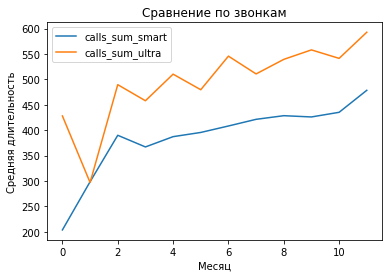

In [34]:
users_data_common_data[['calls_sum_smart', 'calls_sum_ultra']].plot()

plt.title('Сравнение по звонкам')
plt.xlabel('Месяц')
plt.ylabel('Средняя длительность')
plt.show()

Видно, что пользователи тарифа Ультра звонят в среднем  больше, чем абоненты Смарт. И у тех и у других в течении года наблюдалось увеличение длительности звонков, с пиковым значением в декабре

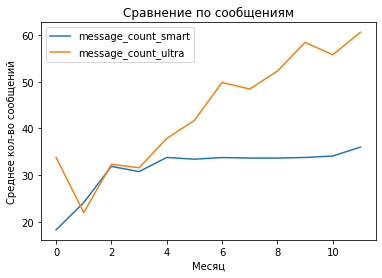

In [35]:
# построим график среднего количества сообщений в месяц
users_data_common_data[['message_count_smart', 'message_count_ultra']].plot()

plt.title('Сравнение по сообщениям')
plt.xlabel('Месяц')
plt.ylabel('Среднее кол-во сообщений')
plt.show()

Видим похожую картину, абоненты Ультра более активно пользуются сообщениями, и их активность растет в течении года, тогда как абоненты Смарт после выхода на среднее около 40 сообщений в месяц на этом уровне и держаться

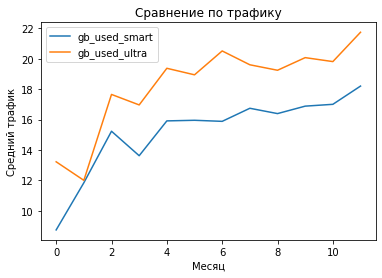

In [36]:
# сравним использование интернет-трафика
users_data_common_data[['gb_used_smart', 'gb_used_ultra']].plot()

plt.title('Сравнение по трафику')
plt.xlabel('Месяц')
plt.ylabel('Средний трафик')
plt.show()

Аналогично, использующие тариф Ультра более активно используют интернет трафик

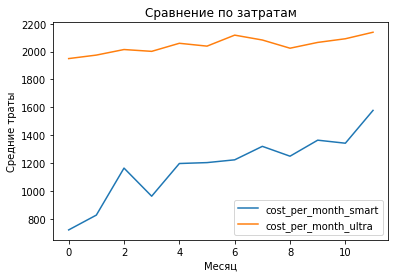

In [37]:
# и посмотрим на средние траты
# сравним использование интернет-трафика
users_data_common_data[['cost_per_month_smart', 'cost_per_month_ultra']].plot()

plt.title('Сравнение по затратам')
plt.xlabel('Месяц')
plt.ylabel('Средние траты')
plt.show()

Очевидно, что пользователи Ультра тратят больше в среднем. Но они редко выходят за рамки включенных в тариф опций, поэтому их среднее в течении года лишь ненамного выше, чем аб плата в размере 1950 рублей.
В то время как абоненты Смарт, у которых аб плата 550 рублей, имеют минимальные средние затраты на уровне 717 рублей, а чаще всего выше 1000 рублей.

Теперь посмотрим на типичного пользователя обоих тарифов. Для этого построим гистограммы по звонкам, сообщениям и трафику для каждого из тарифов.

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: calls_sum, dtype: float64

Дисперсия равна =  100873.63


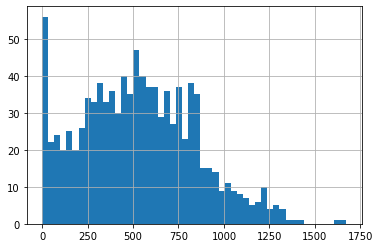

In [38]:
users_data_ultra['calls_sum'].hist(bins = 50)
display(users_data_ultra['calls_sum'].describe())

# посчитаем дисперсию методом var с указанием ddof = 1, так как мы используем выборку из датасета
print('Дисперсия равна = ',round(np.var(users_data_ultra['calls_sum'], ddof = 1), 2))
# выведет тот же результат, что и строка выше
# display(users_data_ultra['calls_sum'].var())

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: calls_sum, dtype: float64

Дисперсия равна =  36219.32


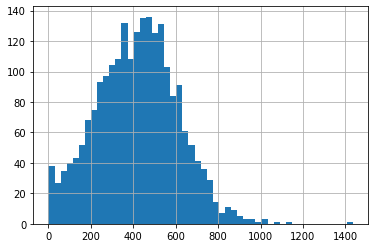

In [39]:
users_data_smart['calls_sum'].hist(bins = 50)
display(users_data_smart['calls_sum'].describe())
print('Дисперсия равна = ',round(np.var(users_data_smart['calls_sum'], ddof = 1), 2))

**Выводы по длительности звонков**
- В обоих тарифах есть те, кто не совершает звонки, видимо используют только сообщения или трафик. 
- пользователи тарифа Смарт чаще всего говорят до 545 минут в месяц, таких 75% абонентов. И более 25% абонентов не укладываются во включенные в тариф минуты. В среднем они наговаривают 419 минут, со стандартным отклонением 189
- пользователи Ультра никогда не превышают порог минут. В среднем разговаривают 545 минут со ст откл 306. Они разговаривают не намного больше абонентов Смарт, но при необходимости увеличивают длительность разговоров, тогда как абоненты Смарт стараются не выходить за лимит

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message_count, dtype: float64

Дисперсия равна =  2285.27


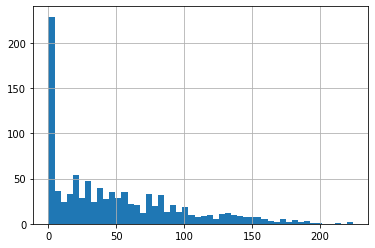

In [40]:
users_data_ultra['message_count'].hist(bins = 50)
display(users_data_ultra['message_count'].describe())
print('Дисперсия равна = ',round(np.var(users_data_ultra['message_count'], ddof = 1), 2))

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_count, dtype: float64

Дисперсия равна =  796.81


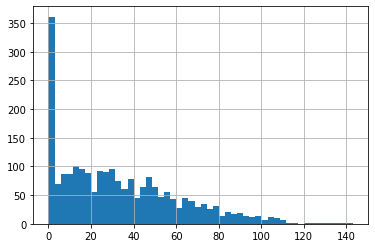

In [41]:
users_data_smart['message_count'].hist(bins = 50)
display(users_data_smart['message_count'].describe())
print('Дисперсия равна = ',round(np.var(users_data_smart['message_count'], ddof = 1), 2))

**Выводы по сообщениям**
- в целом сообщениями пользуются не так активно, как звонками, в обоих тарифах распределение не "нормальное", а с пиками, недалеко отстоящими от нулевых значений
- абоненты Ультра гораздо активнне пользуются сообщениями, в среднем 61 сообщение, против 38 у Смарта 
- чуть более 25% абонентов Смарт отправляет более 50 сообщений, то есть выходит за лимит включенный в тариф
- абоненты Ультра с 1000 сообщений включенных в тариф никогда не выходят за лимит

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

Дисперсия равна =  97.09


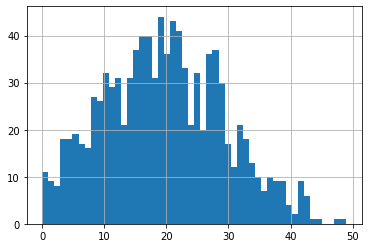

In [42]:
users_data_ultra['gb_used'].hist(bins = 50)
display(users_data_ultra['gb_used'].describe())
print('Дисперсия равна = ',round(np.var(users_data_ultra['gb_used'], ddof = 1), 2))

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

Дисперсия равна =  33.03


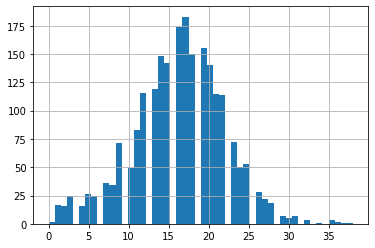

In [43]:
users_data_smart['gb_used'].hist(bins = 50)
display(users_data_smart['gb_used'].describe())
print('Дисперсия равна = ',round(np.var(users_data_smart['gb_used'], ddof = 1), 2))

**Выводы по испозьзованному трафику**
- абоненты Ультра больше пользуются интернетом, но ненамного. Среднее у Ультра 19, а у Смарт 16, при ст отклонении Ультра 9,7, смарт 5,7. 
- Медианное значение у Ультра 19Гб, у Смарт 17Гб, то есть в обоих тарифах трафиком пользуются приблизительно одинаково
- абоненты Ультра никогда не исчерпывали свой лимит звонков и сообщений, в примерно 20% случаев не укладываются в лимит по трафику, а значит доплачивают за него.
- абоненты Смарт примерно в 25% случаев не укладывались в лимит по звонкам, а по трафику они более чем в 50% случаев перебирают сверх лимита, и соответственно также доплачивают за использование.

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: cost_per_month, dtype: float64

Дисперсия равна =  141516.75


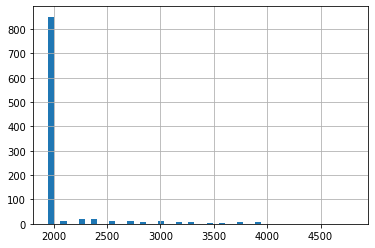

In [44]:
users_data_ultra['cost_per_month'].hist(bins = 50)
display(users_data_ultra['cost_per_month'].describe())
print('Дисперсия равна = ',round(np.var(users_data_ultra['cost_per_month'], ddof = 1), 2))

count    2229.000000
mean     1289.973531
std       818.404367
min       550.000000
25%       550.000000
50%      1023.000000
75%      1750.000000
max      6770.000000
Name: cost_per_month, dtype: float64

Дисперсия равна =  669785.71


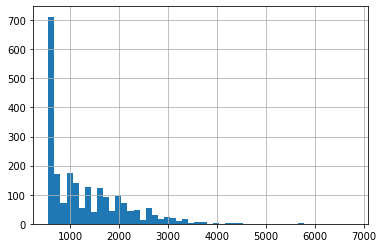

In [45]:
users_data_smart['cost_per_month'].hist(bins = 50)
display(users_data_smart['cost_per_month'].describe())
print('Дисперсия равна = ',round(np.var(users_data_smart['cost_per_month'], ddof = 1), 2))

In [46]:
users_data_smart.query('cost_per_month > 1950')['user_id'].count()

417

**Выводы по расходам**
- абоненты Ультра крайне редко выходят за лимиты включенных в тариф опций. Как мы видели это просходит только с трафиком. Поэтому их средние расходы всего на 120 рублей выше аб платы
- абоненты Смарт при аб плате 550 руб в среднем тратят 1255 руб в месяц
- 383 абонента (более 10% всех абонентов) Смарт тратит в месяц более 1950 рублей, более аб платы в тарифе Ультра

In [47]:
#  код из подсказки ревьюера 
new_table = users_data.pivot_table(
     index = 'tariff',
     values = ['calls_sum', 'message_count', 'gb_used', 'cost_per_month'],
     aggfunc= ['mean', 'var','std'])

new_table.head()


mean                                                    var  \
         calls_sum cost_per_month    gb_used message_count      calls_sum   
tariff                                                                      
smart   417.934948    1289.973531  16.328847     33.384029   36219.315784   
ultra   526.623350    2070.152284  19.494416     49.363452  100873.633397   

                                                       std                 \
       cost_per_month    gb_used message_count   calls_sum cost_per_month   
tariff                                                                      
smart   669785.708006  33.028705    796.812958  190.313730     818.404367   
ultra   141516.745079  97.091686   2285.266143  317.606098     376.187114   

                                
         gb_used message_count  
tariff                          
smart   5.747061     28.227876  
ultra   9.853511     47.804457

## **Проверка гипотез** <a id="гипотезы"></a>

Сформулируем нулевую гипотезу: средняя выручка пользователей тарифов Смарт и Ультра - одинаковы.
Соответственно альтернативная гипотеза: средняя выручка пользователей обоих тарифов различается.

Так как у нас в рассмотрении находятся только выборки из общих данных, будем использовать метод проверки гипотезы по выборкам.

In [48]:
# установим критический уровень статистической значимости на уровне 0.05
alpha = 0.05
# если p-value окажется меньше него - отвергнем гипотезу

# применим метод для проверки гипотезы о равенстве среднего
# для двух датафреймов по разным тарифам
# указав параметр equal_var = False, так как у нас разные по объему выборки (пользователей Смарт больше)
# и мы по всем параметрам видели, что отклонения у выборок разные, значит и дисперсия скорее всего тоже
results = st.ttest_ind(users_data_ultra['cost_per_month'], users_data_smart['cost_per_month'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние выручки разных тарифов - разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние выручки разных тарифов - одинаковые")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу, средние выручки разных тарифов - разные


Мы отвергли гипотезу, что средние выручки пользователей разных тарифов -  одинаковые. Значит верна гипотеза о том, что выручки пользователей разных тарифов - разные.

Нулевая гипотеза - средние выручки пользователей из Москвы и других регионов - одинаковы!
Альтернативная гипотеза - средние выручки пользователей из Москвы и других регионов отличаются друг от друга.

In [49]:
# для этого мы к датафрейму users_data присоединим данные из users
users_data = users_data.merge(users[['user_id', 'city']], on = 'user_id' )

In [50]:
# установим критический уровень статистической значимости на уровне 0.5
alpha = 0.05
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(users_data.query('city == "Москва"')['cost_per_month'], 
                       users_data.query('city != "Москва"')['cost_per_month'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние выручки в Мск и других регионах  - разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние выручки в Мск и других регионах  одинаковые")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу, средние выручки в Мск и других регионах  одинаковые


## **Общие выводы** <a id="выводы"></a>

Рассмотрев имеющиеся данные можно сделать следующие общие выводы исследования:
- исходные данные были предоставлены качественные, без пропусков, с ними удобно сразу работать
- пользователей тарифа Смарт, с более низкой аб платой в выборке больше, чем пользователей Ульта, что вероятно соответствует генеральной совокупности данных о пользователях
- поведение пользователей тарифов - разное. Пользователи тарифа Ультра больше звонят, отправляют СМС и пользуются трафиком
- при этом самая большая разница - в отправке сообщений, в среднем на 30% абоненты Ультра отправляют больше сообщений, тогда как в звонках и трафике разница около 20%
- пользователи тарифа Ультра никогда не выходят за лимиты по звонкам и сообщениям, их плата сверх аб платы может быть только за трафик
- Гипотеза о том, что средние выручки пользователей тарифов Смарт и  Ультра одинаковы - не нашла подтверждения в данных и отвергнута. Данные говорят о том что верна альтернативная гипотеза - выручки пользователей этих двух тарифов - разные.
- Гистограммы расходов показывают, что абоненты Ультра тратят в среднем 2070 рублей в месяц, а Смарт - 1255 р.
- из этого следует главный вывод исследования - коммерческому департаменту необходимо направлять рекламный бюджет на продвижение тарифа Ультра. Его пользователи нагружают сеть больше на 20-30%, а доход приносят на 60% больше
- средние траты в Москве и других городах - одинаковые.



## **Данные о датасетах** <a id="данные"></a>

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)